## 0. Подгрузим библиотеки.

# Bio.Phylo

In [6]:
from Bio import Phylo
from urllib import request
from io import StringIO
import pylab

## 1. Подгрузим файл

In [7]:
file = request.urlopen('https://www.jasondavies.com/tree-of-life/life.txt')
nwk = [line.decode('utf-8') for line in file]
tree = Phylo.read(StringIO(*nwk), 'newick')

## 2. Нарисуем дерево псевдографикой

In [8]:
Phylo.draw_ascii(tree)

                             , Escherichia_coli_EDL933
                             |
                             | Escherichia_coli_O157_H7
                             |
                             , Escherichia_coli_O6
                             |
                             | Escherichia_coli_K12
                             |
                             , Shigella_flexneri_2a_2457T
                             |
                             | Shigella_flexneri_2a_301
                             |
                             , Salmonella_enterica
                             |
                             | Salmonella_typhi
                             |
                             | Salmonella_typhimurium
                             |
                             , Yersinia_pestis_Medievalis
                             |
                             , Yersinia_pestis_KIM
                             |
                            ,| Yersinia_pestis_CO92
                 

## 3, 4 Нарисуем дерево встроенной в Phylo функцией и сохраним в svg и png

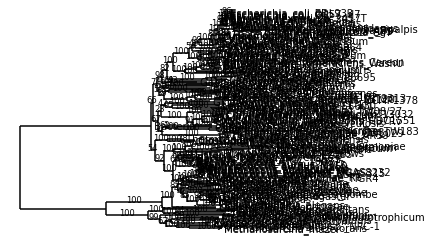

In [11]:
Phylo.draw(tree, do_show=False)
pylab.axis("off")
pylab.rc('lines')
pylab.savefig("tree1py.svg",format='svg', bbox_inches='tight', dpi=600)
pylab.savefig("tree1py.png",format='png', bbox_inches='tight', dpi=600)

## 5. Запишем дерево в xml формат

In [12]:
Phylo.write(tree, 'tree.xml', 'phyloxml')

1

# ETE toolkit 

## 1. Прочтём дерево и загрузим библиотеку

In [13]:
from ete3 import TreeStyle, Tree
tree_ete3 = Tree( *nwk, format=1)
print(tree_ete3)


                                                         /-Escherichia_coli_EDL933
                                                      /-|
                                                     |   \-Escherichia_coli_O157_H7
                                                     |
                                                   /-|      /-Escherichia_coli_O6
                                                  |  |   /-|
                                                  |  |  |   \-Escherichia_coli_K12
                                                  |   \-|
                                                  |     |   /-Shigella_flexneri_2a_2457T
                                                /-|      \-|
                                               |  |         \-Shigella_flexneri_2a_301
                                               |  |
                                               |  |      /-Salmonella_enterica
                                               |  |   /-|
         

## 2. Отрежем несколько нод дерева

In [14]:
tree_ete3.prune(["Archaeoglobus_fulgidus", "Halobacterium_sp._NRC-1", "Methanosarcina_acetivorans",
                "Methanosarcina_mazei"])
print(tree_ete3)


   /-Archaeoglobus_fulgidus
--|
  |   /-Halobacterium_sp._NRC-1
   \-|
     |   /-Methanosarcina_acetivorans
      \-|
         \-Methanosarcina_mazei


## 3. Нарисуем наше дерево

In [15]:
circular_style = TreeStyle()
tree_ete3.render("tree_ete3.png", w=183, units="mm")

{'nodes': [[0.9343302538746397,
   36.67246246457961,
   8.408972284871759,
   44.14710449557673,
   0,
   None],
  [163.240749634944,
   12.146293300370317,
   170.71539166594113,
   19.620935331367434,
   1,
   None],
  [64.41458485900284,
   61.1986316287889,
   71.88922688999996,
   68.67327365978602,
   2,
   None],
  [348.50518469524064,
   40.17620091660951,
   355.9798267262377,
   47.65084294760663,
   3,
   None],
  [208.31118938268472,
   82.2210623409683,
   215.78583141368185,
   89.69570437196542,
   4,
   None],
  [225.68100643120812,
   68.2061085328487,
   233.15564846220525,
   75.68075056384582,
   5,
   None],
  [227.8737275033675,
   96.23601614908789,
   235.3483695343646,
   103.710658180085,
   6,
   None]],
 'faces': [[169.7810614120665,
   1.8686605077492795,
   429.5248719892163,
   29.898568123988472,
   1,
   'Archaeoglobus_fulgidus'],
  [355.0454964723631,
   29.898568123988472,
   646.5565356812507,
   57.92847574022766,
   3,
   'Halobacterium_sp._NRC-1'

![](tree_ete3.png)

In [16]:
circular_style = TreeStyle()
circular_style.mode = "c" 
circular_style.scale = 10
tree_ete3.render("tree_ete3_circ.png", w=183, units="mm", tree_style=circular_style)

{'nodes': [[320.60983483777795,
   322.65972627942415,
   328.8588509526544,
   330.9087423943006,
   0,
   None],
  [336.5154416027455,
   320.7138921495714,
   343.5128534926025,
   327.71130403942846,
   1,
   None],
  [309.744594509404,
   323.8091066311323,
   318.9158035430231,
   332.9803156647514,
   2,
   None],
  [320.8165115505347,
   347.70818425799206,
   327.84438870234203,
   354.73606140979933,
   3,
   None],
  [303.8363417533456,
   304.1693232591064,
   313.7315877968024,
   314.06456930256326,
   4,
   None],
  [293.25429099284366,
   320.9228648143452,
   300.3124996059507,
   327.98107342745226,
   5,
   None],
  [320.30823383470556,
   293.15566165691024,
   327.39663953099466,
   300.24406735319934,
   6,
   None]],
 'faces': [[342.63817700637037,
   311.092450801018,
   585.7982401789016,
   337.33274538798184,
   1,
   'Archaeoglobus_fulgidus'],
  [311.2218771794031,
   353.78888005322,
   338.6526649961349,
   626.7998404762506,
   3,
   'Halobacterium_sp._NR

In [17]:
![](tree_ete3_circ.png)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")
